#### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 讀取資料夾中的資料

In [2]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = 'C:/Users/User/Desktop/KAMPYTHON/KAM整合檔/*.txt'
title, data = readdir(path)


Number of files : 3


#### 顯示部份資料內容

In [3]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 全部保險業----

關鍵查核事項

...
.08)%。"


----Document : 全部證券業----


關鍵查核事項
...
案，備供參考。


----Document : 全部銀行業----
							
關
...
廢損失之計算。




#### 新增詞彙至自定義停止詞彙中

In [4]:
stopword = ['一','二','三','四','五','六','七','八','九','十','年','月','日','用','淨','利','值','前',
             '據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29','一下子', '一九', '一九九九年', '一二八',
             '一兆日圓', '一再', '一勞永逸', '一千七百', '一千五百', '一口', '一向', '一哩路', '一四會計', '一回',
             '一城', '一塊', '一夕', '一天', '一套', '一季', '一宗', '一役', '一心', '一成則', '一手', '一把', '一搏', 
             '一擲', '一攤', '一支', '一方', '一月', '一月底', '一樁', '一比', '一流', '一片', '一百', '一百三十元', 
             '一百九十', '一站', '一筆', '一職', '一舉', '一般性', '一起', '一路', '一身', '一連串', '一進',
            '一下子', '一部', '一項', '一顆', '七七', '七五', '七千', '七四', '七年', '三九', '三五', '三個', '三億',
            '三兆台幣', '三公', '三六', '三十九', '三十五', '三十分', '三千', '三名', '三大會', '三成', '三支', '三方',
            '三月', '三月底', '三率', '三筆', '三等', '三箭', '三緘其口', '三角', '三足鼎立', '三降', '三點', '上個', '上千',
            '上升', '上半年', '上台', '上周', '上層', '上層察覺', '上市', '上揚', '上攻', '上放著', '上旬', '上極',
           '一及', '一所', '一月份', '一期', '一系列', '一類', '七中', '七日', '三七', '三信商業銀行', '三商美邦人壽保險', '三四', 
            '上之關', '上應', '上海商業儲蓄銀行', '上開', '下個', '下單方式', '下述', '下針','不利', '不動', '不得', '不易', '不當',
            '不確', '不符', '不良', '不論', '且屬', '並不', '並且', '並仰', '並依', '並個', '並列','並同', '並執', '並委', '並將', '並對',
            '並就', '並按',  '並於期','所得','未報','記載','元大期貨','群益金鼎證券','部位','中國人壽保險','泰安產物保險','臺銀人壽保險','及其',
            '請詳','該等','上述','宏泰人壽','合併財務報表','符合','臺灣銀行']

puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
#savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [5]:
#stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]

['一', '二', '三', '四', '五', '六', '七', '八', '九', '十']

## 新增詞彙至自定義詞庫，並匯入該詞庫

In [6]:
jieba.load_userdict('C:/Users/User/Desktop/KAMPYTHON/107-1_Python_Project-master/Week_5/dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.358 seconds.
Prefix dict has been built succesfully.


#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [7]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ','.join(jieba.cut(data[i], cut_all=False))

Number of word in document (全部保險業) :  1487
[('\r\n', 2736), (' ', 1351), ('\t', 1213), ('保險', 549), ('負債', 421), ('本會計師', 404), ('\u3000', 330), ('關鍵查核事項', 323), ('準備', 304), ('精算', 222)]
Number of word in document (全部證券業) :  758
[('\r\n', 686), (' ', 500), ('本會計師', 125), ('關鍵查核事項', 104), ('證券', 98), ('報表', 64), ('經紀手續費收入', 55), ('及其', 50), ('合併', 46), ('\u3000', 45)]
Number of word in document (全部銀行業) :  2126
[('\t', 14207), ('\r\n', 3542), ('本會計師', 496), ('放款', 490), ('關鍵查核事項', 418), ('報表', 293), ('合併', 258), ('管理階層', 245), ('請詳', 233), ('減損評估', 207)]


#### 顯示各文件低於閥值 (limit) 的字詞

In [8]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 全部保險業----

----Document : 全部證券業----

----Document : 全部銀行業----



#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [9]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 全部保險業

,關鍵查核事項,
,　,　,關鍵查核事項,係,指依,本會計師,之,專業,判斷,，,對,泰安產物...之份額,分別,占,稅前,淨利,之,(,5.63,),%,及,(,18.08,),%,。,",
,

document : 全部證券業

,
,關鍵查核事項,
,
, , , , ,關鍵查核事項,係,指依,本會計師,之,專業,判...,，,並經,本會計師,
,出具,無,保留,意見,之,查核,報告,在案,，,備供,參考,。,
,

document : 全部銀行業
	,	,	,	,	,	,	,
,關鍵查核事項,	,	,	,	,	,	,	,	,
,關鍵查核事項,...；,針對,相關,業務,未,列入,分割,讓,與,之,資產,，,覆核,報廢,損失,之,計算,。,
,



#### 移除所有標點符號、非中文英文數字之資料

In [10]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff,]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [11]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 全部保險業
,關鍵查核事項,,,,關鍵查核事項,係, ... 前,淨利,之,,,,,及,,,,,,,

document : 全部證券業
,,關鍵查核事項,,,,,,,關鍵查核事 ... 之,查核,報告,在案,,備供,參考,,

document : 全部銀行業
,,,,,,,,關鍵查核事項,,,,,, ... 資產,,覆核,報廢,損失,之,計算,,



#### 初始化 TFIDF 物件，用以計算 tfidf

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [13]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '邱', '並仰', '過去', '度', '三大會', '供', '一步', '淨', '一千五百', '並依', '預測', '認為', '記者', '之', '面板', '一舉', '高', '4', '其中', '三千', '一成則', '八', '據', '同時', '的', '公司', '一起', 'LG', '不僅', '開關鍵', '一季', '人士', '今天', '而', '一手', '電子', '總額', '表示', 'IGZO', '一職', '故', '億', '子公司', 'JDI', '另', '高橋', '完成', '三九', '五', '讓', '品牌', '不符', '一項', '上極', '清單', '億日圓', '土城', '上千', '也', '都', '報告', 'INCJ', '相對', '蘋果', '模型', '29', '一勞永逸', '三支', '就', '仟元', '堺', '人', '一般性', '維持', '上市', '九', '成為', '三月底', '鴻海', '係', '集團', '超過', '資金評估', '三個', '至', '陷入', '仍', '一城', '較', '稅後淨利', 'NT', '百', '加上', '三箭', 'iPhone', '主要', '代工', '經', '不過', 'WitsView', '總部', '人次', '幅度', '向', '是', '一路', '權益', '引述', '率', '夏普', '因為', '三星', '提案', '階段', '進入', '對', '一樁', '五日', '按', '這份', '查核', '三筆', '並個', '可', '下個', '程序', '這個', '一夕', '上之關', '於', '今年', '最終', '手', '再', '但是', '註', '不確', '決定', '不利', '已', '一九', '流量', '年', '上揚', '三名', '一役', '要', '下單方式', '記載', '上放著', '有', '兩家', '所得', '沒', '因此', '年本', '出', '沒有', '元大期貨', '無形', '持續', '10', '台幣', '得', '預估', '一比'

#### 計算 TFIDF 詞頻矩陣

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

#### 顯示 TFIDF 詞頻矩陣大小

In [15]:
tfidf_matrix.shape

(3, 1646)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [16]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['三商美', '下限', '並參考', '並比', '並決', '並決定', '並測', '並無', '並確', '並經本', '並經過', '並自', '並計', '並評', '並重編', '中之部', '中保', '中國', '中國人壽保險', '中央再保險', '中將', '中心', '中較', '中選樣', '主管', '主計', '之二', '之人員', '之估', '之依', '之保單', '之保費', '之備', '之內', '之公', '之分', '之分類', '之加', '之可回', '之可觀', '之品', '之國內', '之國家', '之壓', '之妥', '之子行', '之客', '之專', '之後續', '之性質']


#### 顯示 TFIDF > 閥值 (limit) 的資料

In [17]:
limit = 0.1
wordsperdocument = 10
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if (tfidf_matrix[i,j] > limit) and (count != wordsperdocument):
            print(words[j], tfidf_matrix[i,j])
            count += 1

----Document : 全部保險業----
中國人壽保險 0.1544672320076836
保單 0.1638288824323917
保費 0.49616747250952914
全球人壽保險 0.1357439311582674
宏泰人壽 0.19659465891887004
建置 0.11702063030885122
新光人壽保險 0.11233980509649717
旺旺友聯產物保險 0.11233980509649717
泰安產物保險 0.16850970764474574
自留賠款準備 0.11702063030885122
----Document : 全部證券業----
大展 0.10864512160829295
大慶 0.10864512160829295
宏遠 0.10864512160829295
康和綜合證券 0.17654832261347606
應收證券融資款 0.2172902432165859
有價 0.10864512160829295
期貨 0.1493870422114028
未上市 0.16296768241243942
統一 0.1358064020103662
經紀手續費收入 0.7469352110570141
----Document : 全部銀行業----
備抵呆帳 0.2187260977989965
回收率 0.12645102529004484
應收款 0.33321553961565875
授信 0.1503741922368101
放款 0.8373108431367834


#### 顯示文件相似性矩陣

In [18]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 初始化 Count_vectorizer 物件，用以計算字頻

In [19]:
count_vectorizer = CountVectorizer(max_df = 1, min_df = 0, analyzer = 'word', stop_words = stopword)

#### 計算詞頻矩陣

In [20]:
count_matrix = count_vectorizer.fit_transform(data)

#### 顯示詞頻矩陣大小 (理論上與 TFIDF 詞頻矩陣相同)

In [21]:
count_matrix.shape

(3, 1646)

In [22]:
count_matrix.toarray()

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  2,  4, ...,  3, 10,  0]], dtype=int64)

In [23]:
countframe = pd.DataFrame(count_matrix.toarray().T, index = count_vectorizer.get_feature_names(), columns = title)
countframe.head(10)

,全部保險業,全部證券業,全部銀行業
三商美,1,0,0
下限,0,0,2
並參考,0,0,4
並比,0,0,1
並決,0,0,1
並決定,0,0,5
並測,0,1,0
並無,0,0,5
並確,0,0,3
並經本,0,0,16


#### 初始化 WordCloud 物件

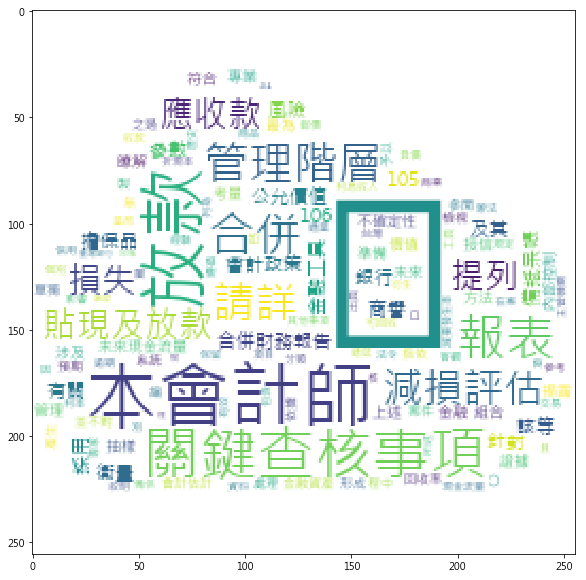

In [24]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
mask = np.array(Image.open("./cloudy.png"))
wordcloud = WordCloud(font_path=font, background_color = 'white', mask = mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("stockholder.png")

#### 顯示整體詞庫的字詞頻率及前十名

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

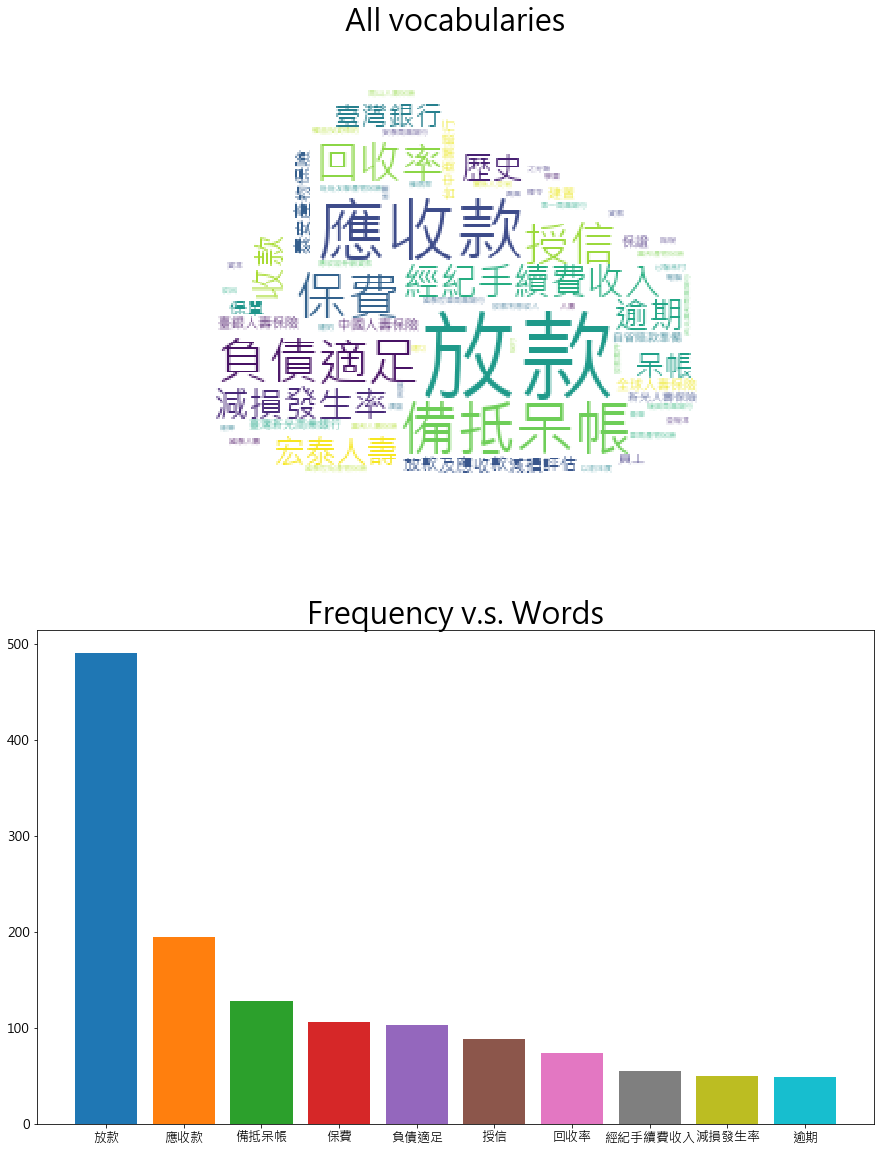

In [25]:
wordDict_key = count_vectorizer.get_feature_names()

wordDict = dict()
for i in range(len(wordDict_key)):
    wordDict_value = 0
    for j in range(len(data)):
        wordDict_value += count_matrix.toarray()[j].tolist()[i]
    wordDict[wordDict_key[i]] = wordDict_value

f = plt.figure(figsize=(15,20))
f.subplots_adjust(wspace = 0)

f.add_subplot(2, 1, 1)
wordcloud.fit_words(wordDict)
plt.title('All vocabularies', fontsize = 30)
plt.axis("off")
plt.imshow(wordcloud)

f.add_subplot(2, 1, 2)
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 30)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#### 顯示各個文件的字詞頻率及前十名

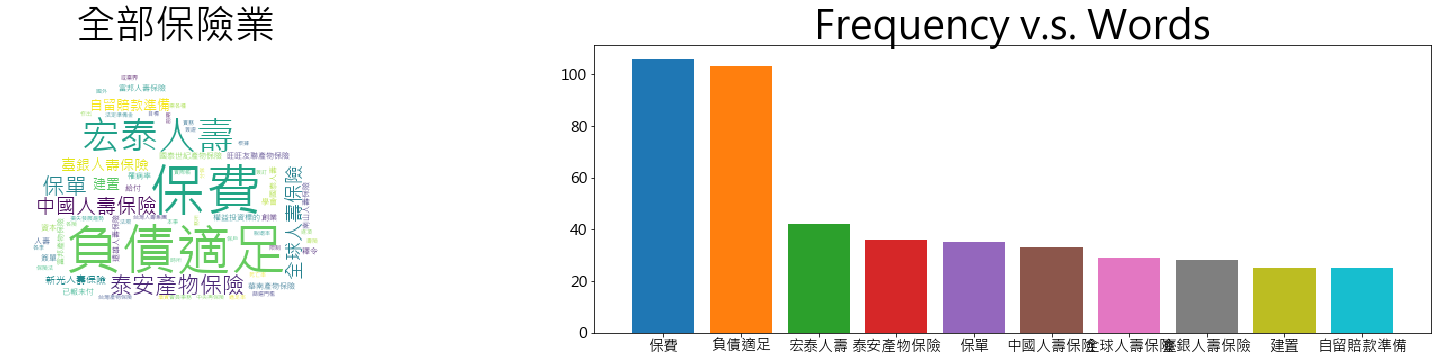

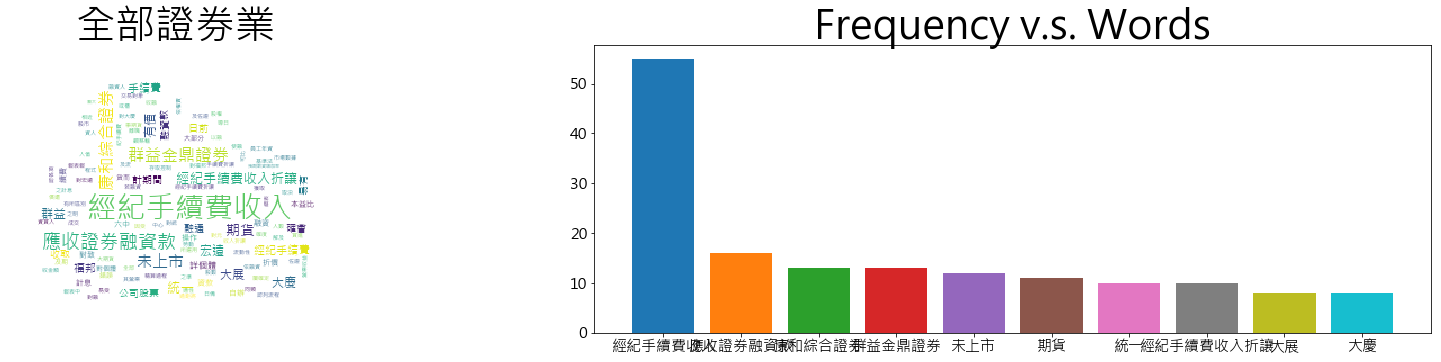

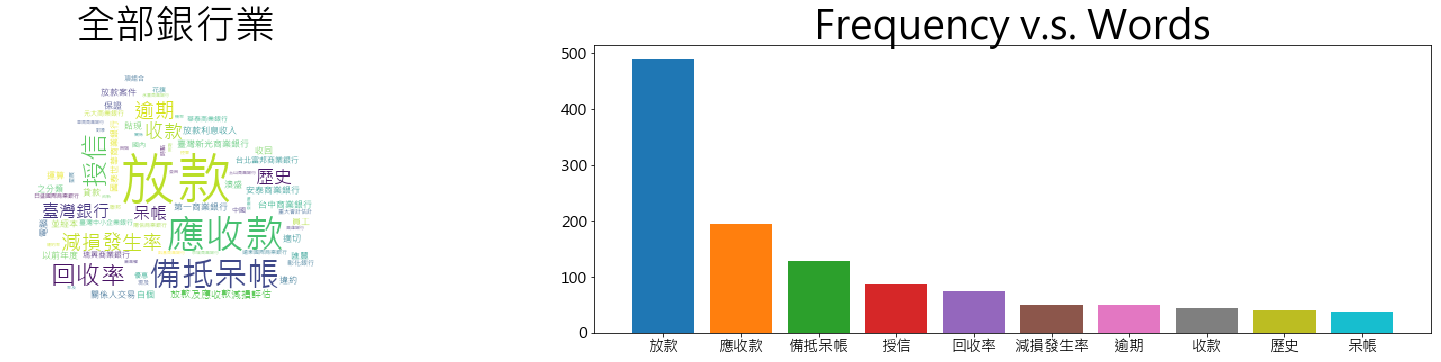

In [26]:
wordDict_key = count_vectorizer.get_feature_names()
plotind = 1
for i in range(len(data)):
    wordDict_value = count_matrix.toarray()[i].tolist()
    wordDict = dict()
    
    for j in range(len(wordDict_key)):
        if wordDict_value[j] != 0:
            wordDict[wordDict_key[j]] = wordDict_value[j]
            
    f = plt.figure(figsize=(30,6*len(data)))
    f.subplots_adjust(wspace = 0)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    wordcloud.fit_words(wordDict)
    plt.title('{0}'.format(title[i]), fontsize = 40)
    plt.axis("off")
    plt.imshow(wordcloud)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    for i in range(10 if (len(sort)>10) else len(sort)):
        plt.bar(sort[i][0], sort[i][1])
    plt.title('Frequency v.s. Words', fontsize = 40)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

![stock](鴻海股價.png)

#### 定義 addstopword 及 adddict 函式

In [27]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
                text = f.read()
                encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        clear_output()
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

#### 新增停止詞彙 (半自動)

In [ ]:
stop, stay = addstopword(tfidf_vectorizer.get_feature_names())
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])
print(stay)
print('Save {0} words to stayword'.format(len(stay)))
savetofile('./stay.txt', [stay])

三商美


#### 新增停止詞彙 (手動)

In [ ]:
stop = addword()
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])

#### 新增自定義字典詞彙 (手動)

In [ ]:
dictionary = addword()
clear_output()
print(dictionary)
print('Save {0} words to stopword'.format(len(dictionary)))
savetofile('./dict.txt', [dictionary])